In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [11]:
# Path ke folder dataset
dataset_dir = "./datasets"

In [12]:
# Inisialisasi ImageDataGenerator dengan augmentasi dan rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi gambar
    validation_split=0.2,  # Split dataset 80% train, 20% validation
    shear_range=0.2,       # Augmentasi: shear
    zoom_range=0.2,        # Augmentasi: zoom
    horizontal_flip=True   # Augmentasi: flip horizontal
)

# Path ke folder training
train_dir = f"{dataset_dir}/training"

# Muat dataset untuk training dari direktori 'training'
train_generator = train_datagen.flow_from_directory(
    train_dir,             # Path ke folder training
    target_size=(128, 128), # Ukuran gambar yang akan di-rescale
    batch_size=32,          # Batch size
    class_mode='categorical', # Mode klasifikasi
    subset='training',      # Subset untuk training
    shuffle=True            # Mengacak data
)

# Muat dataset untuk validasi dari direktori 'training'
validation_generator = train_datagen.flow_from_directory(
    train_dir,             # Path ke folder training
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',   # Subset untuk validasi
    shuffle=True
)

# Untuk validation, kamu bisa menggunakan ImageDataGenerator tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Path ke folder validation
test_dir = f"{dataset_dir}/validation"

# Muat dataset untuk validation
test_generator = test_datagen.flow_from_directory(
    test_dir,              # Path ke folder validation
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical', # Sesuaikan class_mode
    shuffle=False          # Tidak perlu diacak untuk validation
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [13]:
# Load ResNet50 tanpa fully connected layers (include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Tambahkan lapisan tambahan
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(128, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer

# Buat model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Bekukan layer di base_model agar tidak dilatih
for layer in base_model.layers:
    layer.trainable = False

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Melatih model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.5223 - loss: 0.6922 - val_accuracy: 0.5803 - val_loss: 0.6636
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.5794 - loss: 0.6692 - val_accuracy: 0.6184 - val_loss: 0.6459
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 140s 684ms/step - accuracy: 0.6123 - loss: 0.6510 - val_accuracy: 0.6740 - val_loss: 0.6283
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 123s 595ms/step - accuracy: 0.6396 - loss: 0.6400 - val_accuracy: 0.6452 - val_loss: 0.6315
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 118s 574ms/step - accuracy: 0.6419 - loss: 0.6343 - val_accuracy: 0.6527 - val_loss: 0.6260
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 117s 568ms/step - accuracy: 0.6355 - loss: 0.6322 - val_accuracy: 0.6334 - val_loss: 0.6354
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 123s 600ms/step - accuracy: 0.6424 - loss: 0.6303 - val_accuracy: 0.6471 - val_loss: 0.6292
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 122s 593ms/step - accuracy: 0.6403 - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Hasil prediksi: dogs


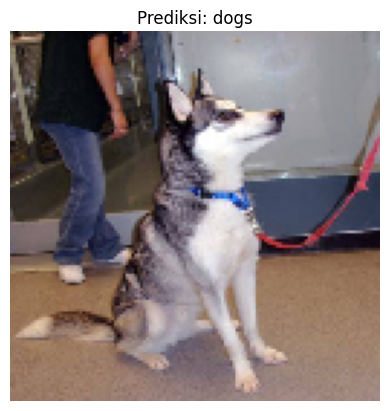

In [15]:
# Load dan preprocess salah satu gambar untuk pengujian
img_path = './datasets/validation/dogs/dog.4001.jpg'  # Ubah ke path gambar yang diinginkan
img = image.load_img(img_path, target_size=(128, 128))  # Ukuran gambar untuk InceptionV3
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalisasi gambar

# Prediksi gambar menggunakan model
predictions = model.predict(img_array)
predicted_class_idx = np.argmax(predictions, axis=1)[0]

# Dapatkan peta label dari train_generator
class_indices = train_generator.class_indices
# Membalik mapping: indeks ke label
labels = {v: k for k, v in class_indices.items()}

# Ambil label sebenarnya dari indeks prediksi
predicted_label = labels[predicted_class_idx]

# Tampilkan hasil prediksi
print(f"Hasil prediksi: {predicted_label}")

# Tampilkan gambar
plt.imshow(img)
plt.title(f"Prediksi: {predicted_label}")
plt.axis('off')  # Matikan sumbu
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Hasil prediksi: dogs


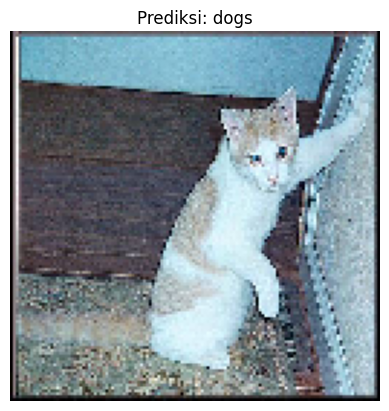

In [16]:
# Load dan preprocess salah satu gambar untuk pengujian
img_path = './datasets/validation/cats/cat.4001.jpg'  # Ubah ke path gambar yang diinginkan
img = image.load_img(img_path, target_size=(128, 128))  # Ukuran gambar untuk InceptionV3
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalisasi gambar

# Prediksi gambar menggunakan model
predictions = model.predict(img_array)
predicted_class_idx = np.argmax(predictions, axis=1)[0]

# Dapatkan peta label dari train_generator
class_indices = train_generator.class_indices
# Membalik mapping: indeks ke label
labels = {v: k for k, v in class_indices.items()}

# Ambil label sebenarnya dari indeks prediksi
predicted_label = labels[predicted_class_idx]

# Tampilkan hasil prediksi
print(f"Hasil prediksi: {predicted_label}")

# Tampilkan gambar
plt.imshow(img)
plt.title(f"Prediksi: {predicted_label}")
plt.axis('off')  # Matikan sumbu
plt.show()

In [18]:
labels = {v: k for k, v in class_indices.items()}